# <b>1 <span style='color:#00008B'>|</span>  EDA</b>

## <b>1.1 <span style='color:#2ae4f5'>|</span>  Imports de Bibliotecas</b>

In [ ]:
%pip install pandas numpy matplotlib seaborn sklearn

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif


## <b>1.2 <span style='color:#2ae4f5'>|</span>  Carregamento do Dataset</b>

Configuracoes básicas de visualização

In [142]:
pd.set_option("display.max_columns", 50)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
colors = ["#0101DF", "#DF0101"]

In [5]:
df = pd.read_csv("../datasets/base_antifraude.gz", compression="gzip", sep='\t')

print("Formato do dataset:", df.shape)
df.head()

Formato do dataset: (47732, 205)


/var/folders/40/wt_fcnd546jc4_4rr2q97fs40000gn/T/ipykernel_23122/2741465154.py:1: DtypeWarning: Columns (203) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../datasets/base_antifraude.gz", compression="gzip", sep='\t')


,id,documento,mes_ref,alvo,vlr_financiado,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,...,VAR176,VAR177,VAR178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200
0,4db9c75f6a31c73414ad84fdd101b5d7,d92fa549809f55b4ea13caa1b108896f,202307,0.0,17820.60,0.166667,0.0,0.0,1.000000,NaN,0.0,0.910228,NaN,NaN,0.30,0.418605,NaN,NaN,0.0,0.080733,0.075134,NaN,0.030092,0.244624,NaN,...,0.0,NaN,NaN,NaN,0.333333,0.0,0.010,0.215811,0.001001,ALTA,0.111111,NaN,0.0,0.005289,NaN,0.609314,0.0,0.095790,NaN,0.066331,NaN,0.666667,0.135065,SUDESTE,0.0
1,9b07d4001632189d19de964894501e34,1af133c98723189f24bbfcb75abfcf92,202307,0.0,18513.56,0.166667,0.0,0.0,0.027211,NaN,0.0,NaN,NaN,NaN,0.04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,1.000000,ALTISSIMA,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NORTE,0.0
2,d55b6a81203f5a5ae6f362c483f36ff1,9e95be945b56ff10dc43df22381c9002,202307,0.0,22943.80,0.000000,0.0,0.0,0.013605,NaN,0.0,NaN,NaN,NaN,0.00,0.069767,NaN,0.228978,NaN,NaN,NaN,NaN,0.080593,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,0.012,NaN,0.005005,ALTA,0.055556,NaN,0.0,0.099451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,SUL,0.0
3,f6bb36049c3b42a62dfa88c46e0f79d2,50502098d83c37b5fa60241bc4bd6641,202307,0.0,19177.58,0.083333,0.0,0.0,0.020408,NaN,0.0,NaN,NaN,NaN,0.02,0.116279,NaN,NaN,NaN,NaN,NaN,NaN,0.044997,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.002,NaN,1.000000,ALTISSIMA,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833333,NaN,NORTE,0.0
4,2755ed6330b4980ea24faa1081183dc7,aad24a7552d24b46188103f4249f17e7,202307,0.0,16644.85,0.000000,0.0,0.0,0.000000,NaN,0.0,NaN,NaN,NaN,0.00,0.093023,NaN,NaN,0.0,NaN,NaN,NaN,0.359038,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.011,NaN,1.000000,MEDIA,NaN,NaN,0.0,0.055098,NaN,0.045513,NaN,0.532964,NaN,NaN,NaN,0.500000,NaN,NORDESTE,0.0


47732, 205 bate com a descrição do projeto.

## <b>1.3 <span style='color:#2ae4f5'>|</span>  Estatísticas Iniciais</b>

Infos básicas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47732 entries, 0 to 47731
Columns: 205 entries, id to VAR200
dtypes: float64(190), int64(1), object(14)
memory usage: 74.7+ MB


Estatísticas básicas com describe

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mes_ref,47732.0,202309.288653,1.646360,2.023070e+05,202308.000000,202309.000000,202311.000000,202312.000000
alvo,47732.0,0.041607,0.199692,0.000000e+00,0.000000,0.000000,0.000000,1.000000
vlr_financiado,47594.0,19183.781266,5535.485493,2.427880e+03,15742.620000,18836.810000,22276.500000,91283.650000
VAR1,26947.0,0.201139,0.253286,0.000000e+00,0.000000,0.083333,0.333333,1.000000
VAR2,26947.0,0.156529,0.293852,0.000000e+00,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
VAR195,2238.0,0.293470,0.222681,3.038740e-07,0.107887,0.240976,0.450916,1.000000
VAR196,7704.0,0.308971,0.201970,1.120454e-06,0.163283,0.277927,0.409290,1.000001
VAR197,35629.0,0.489437,0.180096,0.000000e+00,0.333333,0.500000,0.500000,1.000000
VAR198,3838.0,0.259947,0.189631,6.222729e-05,0.130120,0.211768,0.336232,1.000062


Atributos com mais de 80% de dados faltantes

In [25]:
df.isna().mean().sort_values(ascending=False).head(90)

VAR87     0.998827
VAR24     0.993170
VAR157    0.990174
VAR121    0.990070
VAR148    0.983114
            ...   
VAR196    0.838599
VAR54     0.836420
VAR179    0.834702
VAR16     0.828899
VAR43     0.817900
Length: 90, dtype: float64

In [92]:
missing_stats = pd.DataFrame({
    'variavel': df.columns,
    'qtd_missing': df.isnull().sum(),
    'perc_missing': df.isnull().sum() / len(df) * 100
}).sort_values('perc_missing', ascending=False)

print(f"\nResumo dos dados faltantes:")
print(f"- Variáveis com >90% missing: {len(missing_stats[missing_stats['perc_missing'] > 90])}")
print(f"- Variáveis com >80% missing: {len(missing_stats[missing_stats['perc_missing'] > 80])}")
print(f"- Variáveis com >50% missing: {len(missing_stats[missing_stats['perc_missing'] > 50])}")


Resumo dos dados faltantes:
- Variáveis com >90% missing: 57
- Variáveis com >80% missing: 95
- Variáveis com >50% missing: 139


Text(0, 0.5, 'Frequência')

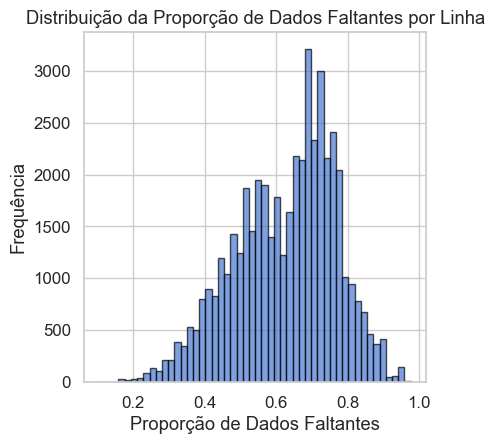

In [87]:
df['prop_dados_faltantes'] = df.isnull().sum(axis=1) / df.shape[1]
    
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['prop_dados_faltantes'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribuição da Proporção de Dados Faltantes por Linha')
plt.xlabel('Proporção de Dados Faltantes')
plt.ylabel('Frequência')

In [127]:
classe0 = df[df['alvo'] == 0]['prop_dados_faltantes']
classe1 = df[df['alvo'] == 1]['prop_dados_faltantes']

print(f"Diferença de médias: {classe1.mean() - classe0.mean():.3f}")
print(f"Razão de médias: {classe1.mean() / classe0.mean():.2f}x")

# Teste de hipótese para verificar se a diferença é significativa
from scipy import stats
t_stat, p_value = stats.ttest_ind(classe0, classe1, nan_policy='omit')
print(f"Teste t: estatística = {t_stat:.3f}, p-value = {p_value:.4f}")

Diferença de médias: -0.005
Razão de médias: 0.99x
Teste t: estatística = 1.415, p-value = 0.1570


Não há evidência estatística de que a proporção de dados faltantes difere entre transações fraudulentas e não fraudulentas. As distribuições são praticamente idênticas, indicando que os missing values não estão associados ao fenômeno de fraude.

## <b>1.4 <span style='color:#2ae4f5'>|</span>  Análise de Distribuições e Correlações</b>

### Classe Alvo

Vamos analizar a distribuição de classes do alvo.

In [138]:
df['alvo'].value_counts()

alvo
0.0    45746
1.0     1986
Name: count, dtype: int64

In [137]:
print('Não pagou a primeira parcela: ', round(df['alvo'].value_counts()[0]/len(df) * 100,2))
print('Pagou a primeira parcela: ', round(df['alvo'].value_counts()[1]/len(df) * 100,2))

Não pagou a primeira parcela:  95.84
Pagou a primeira parcela:  4.16


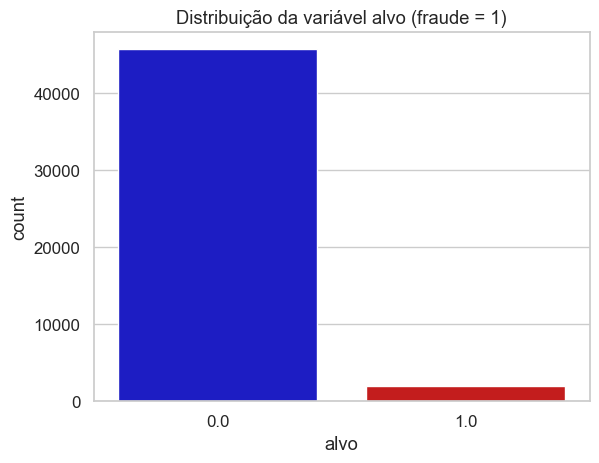

In [145]:
df['alvo'].value_counts(normalize=True) * 100

sns.countplot(data=df, x='alvo', hue='alvo', palette=colors, legend=False)
plt.title("Distribuição da variável alvo (fraude = 1)")
plt.show()

Podemos observar um forte desbalanceamento de classes, onde o numero de não pagantes da primeira parcela é muito menor do que o de pagantes. Claro, isso já era esperado. 

### Valor financiado

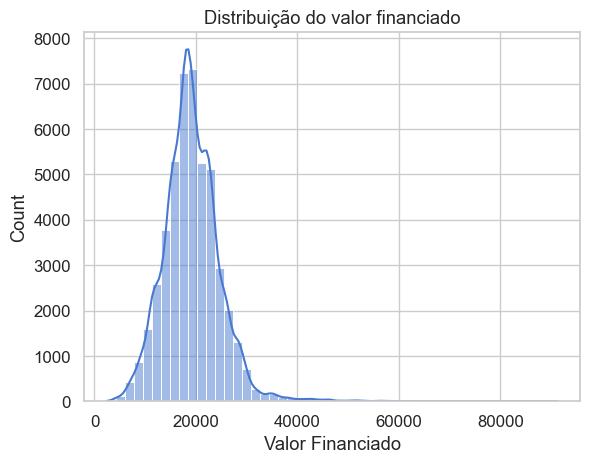

In [27]:
sns.histplot(df['vlr_financiado'], bins=50, kde=True)
plt.title("Distribuição do valor financiado")
plt.xlabel("Valor Financiado")
plt.show()

### Mês de referência

Podemos análisar também a taxa de possiveis fraudes por mês.

[202307 202308 202309 202310 202311 202312]


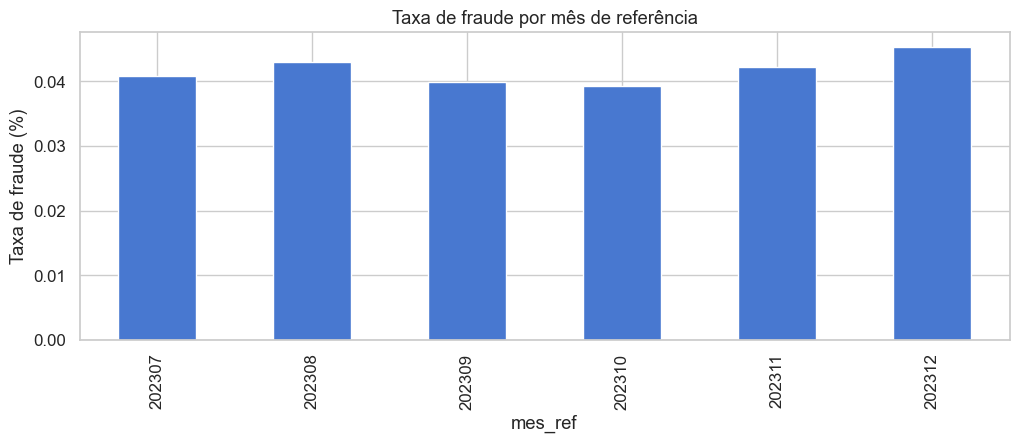

In [ ]:
fraude_mes = df.groupby("mes_ref")['alvo'].mean()

# Só confirmando que todos os meses estão sendo exibidos na analise de distribuição.
print(df['mes_ref'].unique())

fraude_mes.plot(kind='bar', figsize=(12,4))
plt.title("Taxa de fraude por mês de referência")
plt.ylabel("Taxa de fraude (%)")
plt.show()

Nenhum dos meses parece se destacar muito em relação aos outros. Mas é importante termos noção da volumetria em cada mes de referência para validarmos se essas diferencas são relevantes ou não. 

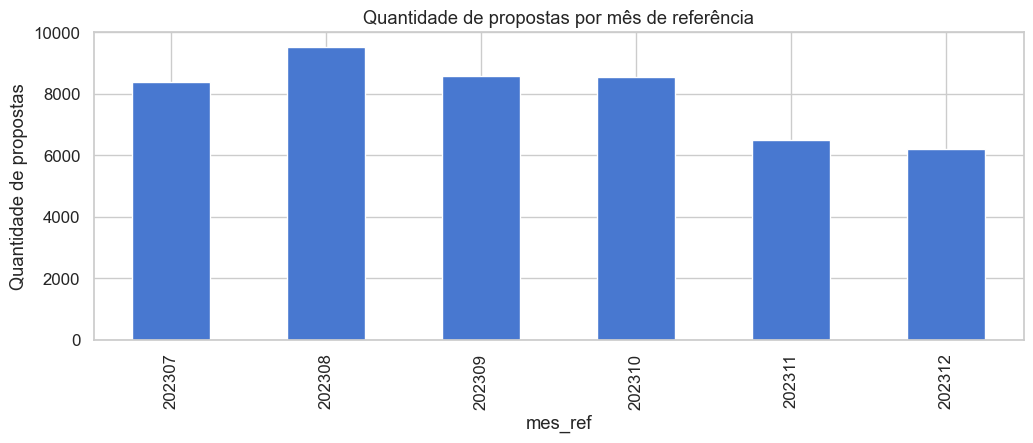

In [34]:
propostas_mesRef = df.groupby("mes_ref")['alvo'].count()

propostas_mesRef.plot(kind='bar', figsize=(12,4))
plt.title("Quantidade de propostas por mês de referência")
plt.ylabel("Quantidade de propostas")
plt.show()

Interessante observar que o mes de dezembro onde houveram mais casos de não pagamento da primeira parcela (percentualmente), foi o mês em que houveram menos propostas.

### Reincidência

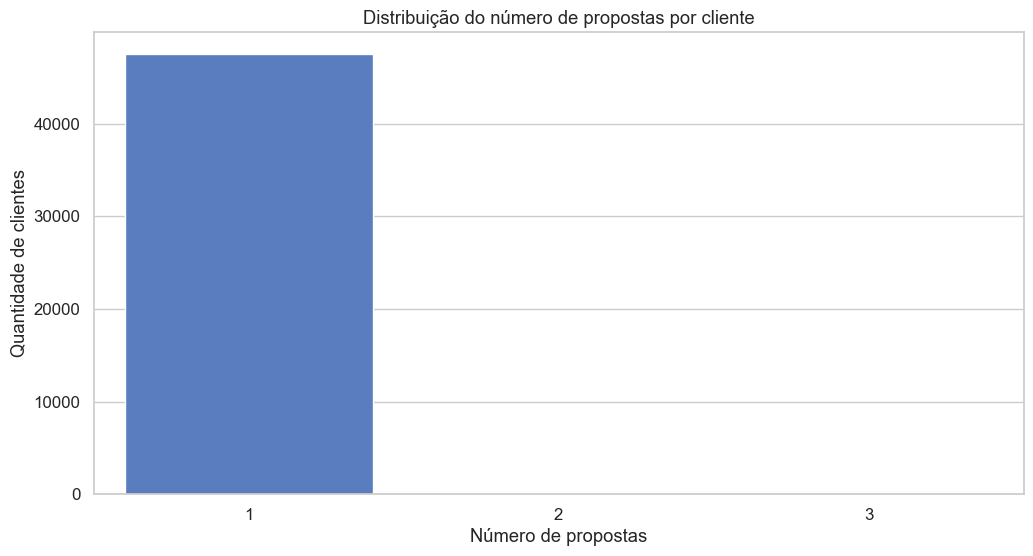

In [61]:
clientes_reincidentes = df['documento'].value_counts()


plt.figure(figsize=(12, 6))
sns.countplot(x=clientes_reincidentes.values)
plt.title("Distribuição do número de propostas por cliente")
plt.xlabel("Número de propostas")
plt.ylabel("Quantidade de clientes")
plt.show()

Como já era esperado, a quantidade de não reincidentes é muito maior quando comparada aos reincidentes, então vamos verificar manualmente.

In [62]:
clientes_com_multiplas_propostas = clientes_reincidentes[clientes_reincidentes > 1]

print(f'Temos {clientes_com_multiplas_propostas.count()} casos com > 1 proposta')

Temos 123 casos com > 1 proposta


Propostas feitos mais de duas vezes pelo mesmo cliente: 2


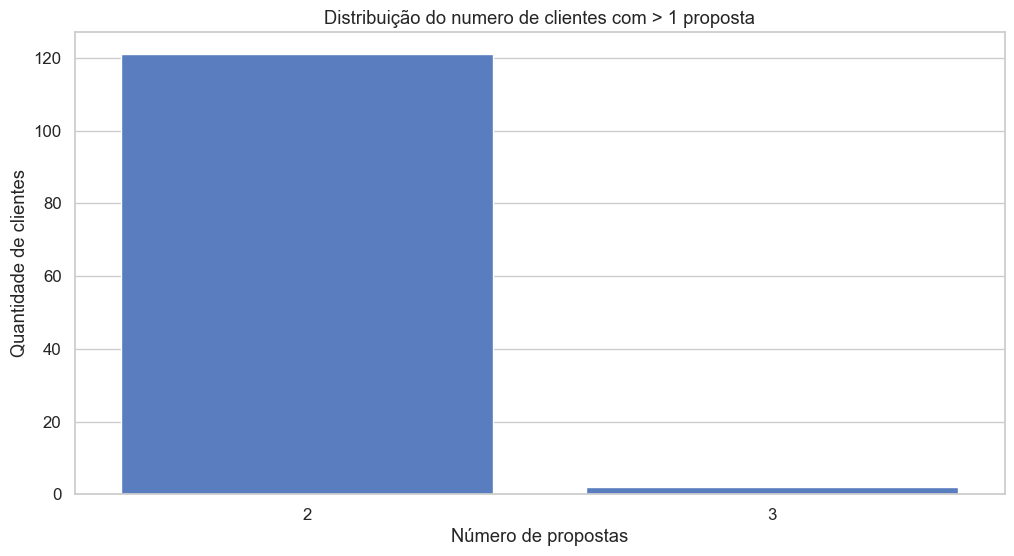

In [60]:
# Casos c 3 propostas, já que são bem menos do que os casos com 2.
print(f'Propostas feitos mais de duas vezes pelo mesmo cliente: {clientes_reincidentes[clientes_reincidentes > 2].count()}')


plt.figure(figsize=(12, 6))
sns.countplot(x=clientes_com_multiplas_propostas.values)
plt.title("Distribuição do numero de clientes com > 1 proposta")
plt.xlabel("Número de propostas")
plt.ylabel("Quantidade de clientes")
plt.show()

### Correlações

Vamos analisar a correlação dos atributos numéricos com o alvo.

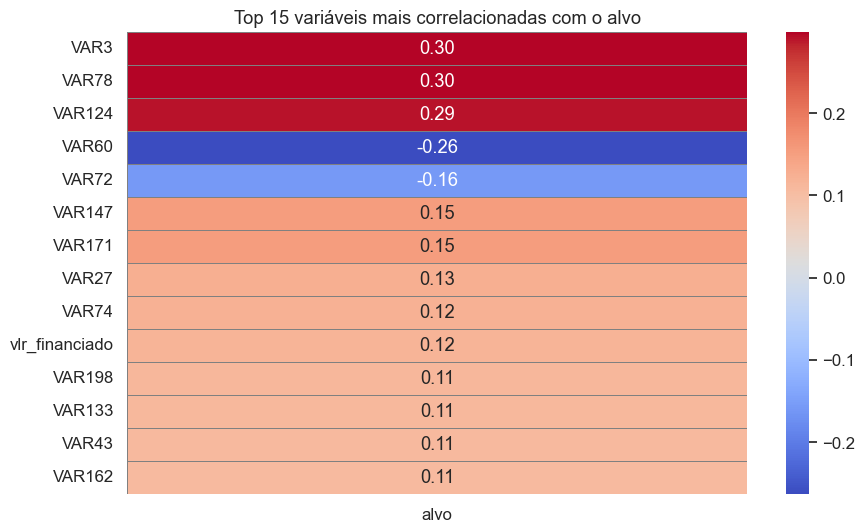

In [177]:
num_cols = df.select_dtypes(include=np.number).columns

corr = df[num_cols].corr()

corr_target = corr['alvo'].abs().sort_values(ascending=False)

# Selecionar apenas 15 variáveis, já que os valores de correlação não foram particulamente expressivos.
top_corr = corr_target.head(15).index

rows = [c for c in top_corr if c != 'alvo']
data = corr.loc[rows, ['alvo']]

plt.figure(figsize=(10,6))
sns.heatmap(data, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Top 15 variáveis mais correlacionadas com o alvo")
plt.show()

As variáveis VAR3, VAR78, VAR124 são as com maior correlação positiva (quanto maior, maior a chance da classe alvo indicar 1), enquanto que as VAR60 e VAR72 de correlação negativa (quanto menor, maior a chance da classe alvo indicar 1). 
No entanto, nenhuma variavel está expressivamente correlacionada com a classe alvo (pelo menos > 0.5), o que indica que o modelo precisará combinar várias classes para capturar um padrão.

### Mutual Information

In [166]:
masked_cols = df.drop(columns=['id','documento','mes_ref','vlr_financiado','alvo']).columns
X_masked = df[masked_cols]

In [ ]:
X_num = X_masked.select_dtypes(include=['int64','float64'])

X_num_filled = X_num.fillna(0)

from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.01)  # < 1% de variância
vt.fit(X_num_filled)

low_variance_cols = X_num_filled.columns[~vt.get_support()]

print(f"Variáveis numéricas de baixa variância detectadas: {len(low_variance_cols)}")
display(low_variance_cols)


Variáveis numéricas de baixa variância detectadas: 88


Index(['VAR5', 'VAR6', 'VAR8', 'VAR9', 'VAR12', 'VAR14', 'VAR15', 'VAR17',
       'VAR19', 'VAR20', 'VAR21', 'VAR24', 'VAR25', 'VAR26', 'VAR27', 'VAR35',
       'VAR37', 'VAR43', 'VAR47', 'VAR49', 'VAR50', 'VAR53', 'VAR55', 'VAR56',
       'VAR60', 'VAR61', 'VAR71', 'VAR72', 'VAR73', 'VAR74', 'VAR75', 'VAR76',
       'VAR77', 'VAR79', 'VAR82', 'VAR84', 'VAR85', 'VAR87', 'VAR88', 'VAR92',
       'VAR94', 'VAR95', 'VAR105', 'VAR115', 'VAR116', 'VAR117', 'VAR118',
       'VAR120', 'VAR121', 'VAR125', 'VAR126', 'VAR127', 'VAR130', 'VAR131',
       'VAR133', 'VAR134', 'VAR136', 'VAR137', 'VAR139', 'VAR140', 'VAR142',
       'VAR143', 'VAR145', 'VAR146', 'VAR147', 'VAR148', 'VAR149', 'VAR150',
       'VAR151', 'VAR153', 'VAR156', 'VAR157', 'VAR160', 'VAR162', 'VAR163',
       'VAR164', 'VAR168', 'VAR169', 'VAR170', 'VAR171', 'VAR174', 'VAR176',
       'VAR178', 'VAR179', 'VAR181', 'VAR192', 'VAR195', 'VAR198'],
      dtype='object')

### Abordagem por subsample

Estudos recentes mostram que a abordagem por subsampling pode trazer observacoes importantes durante a análise de correlações e distribuições.

˜Altalhan, Manahel, Abdulmohsen Algarni, and Monia Turki-Hadj Alouane. "Imbalanced data problem in machine learning: A review." IEEE Access (2025).˜

Vamos gerar uma subamostra com a mesma quantidade de dados de alvo = 0 e alvo = 1 e analisar o impacto disso na analise de correlacoes.

In [188]:
df = df.sample(frac=1)

fraud_df = df.loc[df['alvo'] == 1]
non_fraud_df = df.loc[df['alvo'] == 0][:1986]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,id,documento,mes_ref,alvo,vlr_financiado,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,...,VAR178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,prop_dados_faltantes,categoria_missing
29182,8228e95b49b47839939e457cc31180a1,0c6f9ac614cb2748a0126857e8600ac0,202310,0.0,25537.04,0.583333,0.0,0.0,1.000000,NaN,0.0,0.398705,NaN,0.134118,0.16,0.069767,0.54708,NaN,0.0,0.065753,0.043911,NaN,0.013405,NaN,NaN,...,NaN,NaN,0.0,0.0,0.001,NaN,0.018018,ALTISSIMA,NaN,NaN,0.0,0.548084,0.729869,0.273008,NaN,0.385444,NaN,NaN,NaN,0.000000,0.114433,SUL,0.545455,0.380488,20-40%
38187,8495a08fdff9a98fdacd0f1f2b903169,7666a8bc7310be9e6330f7405bc8820e,202312,1.0,22410.95,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUDESTE,0.000000,0.863415,80-100%
26718,8263b1a656f8075154d99a42ee877872,d562b3fbd55f371932a05c4ac1f24816,202310,0.0,16297.72,NaN,NaN,0.0,1.000000,NaN,0.0,NaN,NaN,NaN,NaN,0.046512,NaN,NaN,0.0,NaN,0.298793,NaN,0.087211,NaN,NaN,...,NaN,NaN,0.0,0.0,0.001,NaN,0.006006,ALTA,NaN,NaN,0.0,0.159996,NaN,0.118312,NaN,0.390013,NaN,NaN,NaN,0.666667,NaN,SUDESTE,0.000000,0.565854,40-60%
11355,9ea89671c9ac8a9c53062381b303f4d4,70d5c2baaff63f55d7189eb241708440,202308,1.0,19021.88,0.000000,0.0,0.0,0.006803,NaN,0.0,NaN,NaN,NaN,0.00,0.023256,NaN,NaN,NaN,NaN,NaN,NaN,0.010327,NaN,NaN,...,NaN,NaN,0.0,NaN,0.021,NaN,1.000000,MEDIA,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,SUDESTE,0.000000,0.692683,60-80%
46039,1c79085f66340d8be06a09cfd2eb4f11,91ba0462b608ec92f7e301ef26e72275,202312,0.0,19755.09,0.333333,0.0,NaN,0.204082,NaN,0.0,NaN,NaN,NaN,0.16,0.046512,NaN,NaN,NaN,NaN,NaN,NaN,0.040392,NaN,NaN,...,NaN,NaN,0.0,NaN,0.007,NaN,0.303303,MEDIA,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.751220,60-80%


Distribution of the Classes in the subsample dataset
alvo
0.0    0.5
1.0    0.5
Name: count, dtype: float64


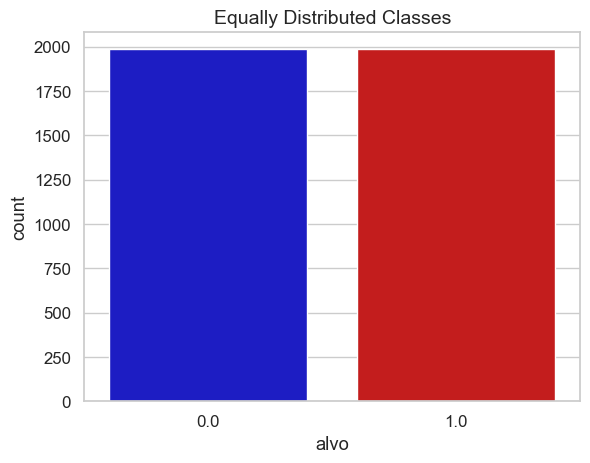

In [161]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['alvo'].value_counts()/len(new_df))


sns.countplot(data=new_df, x='alvo', hue='alvo', palette=colors, legend=False)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

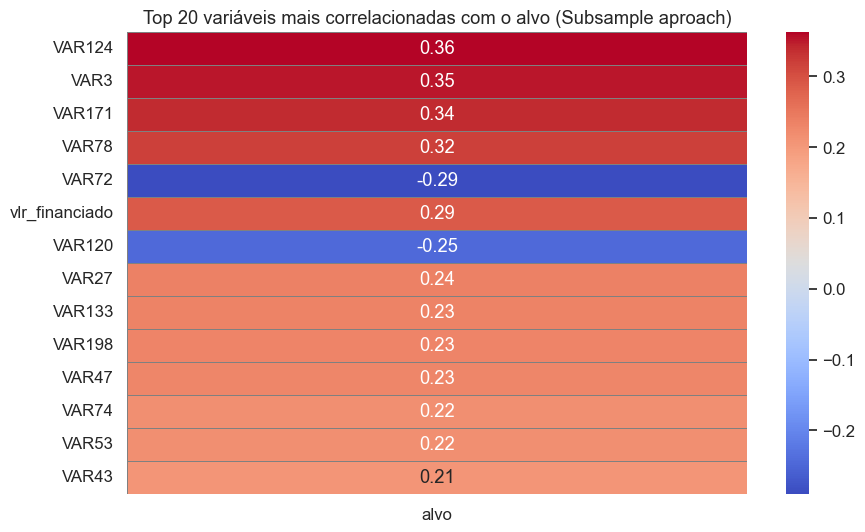

In [ ]:
num_cols = new_df.select_dtypes(include=np.number).columns

sub_sample_corr = new_df[num_cols].corr()

corr_target = sub_sample_corr['alvo'].abs().sort_values(ascending=False)

# Selecionar apenas 15 variáveis, já que os valores de correlação não foram particulamente expressivos.
top_corr = corr_target.head(15).index

rows = [c for c in top_corr if c != 'alvo']
data = sub_sample_corr.loc[rows, ['alvo']]

plt.figure(figsize=(10,6))
sns.heatmap(data, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Top 15 variáveis mais correlacionadas com o alvo (Subsample aproach)")

plt.show()

Com essa abordagem, podemos observar várias variaveis que apresentam uma correlação relevante com a classe alvo!

Os resultados são compativeis com os obtidos sem o subsample, mas mostrar uma correlação um pouco maior para as VARs 124, 3 e 78 e trás uma nova correlação expressiva com a 171. Além delas, o vlr_financiado aparece com correlação um pouco mais relevante, além das outras VARs que aumentaram também.

Como a maior parte das variaveis em questão estão mascaradas, é dificil elaborar hipóteses consistentes com base nesse heatmap, mas em um cenário real poderiamos utilizar essas informacoes para embasar nossas hipóteses.

### Abordagem por SMOTE

## <b>1.5 <span style='color:#2ae4f5'>|</span>  Identificação de Outliers</b>

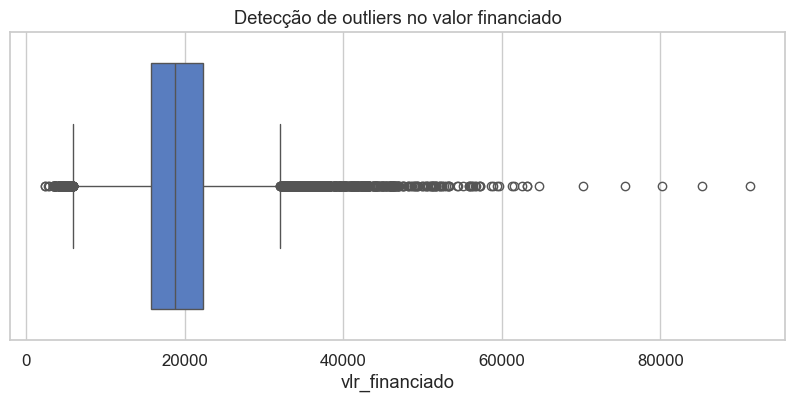

Quantidade de outliers em vlr_financiado: 799 (1.67%)


In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['vlr_financiado'])
plt.title("Detecção de outliers no valor financiado")
plt.show()

q1 = df['vlr_financiado'].quantile(0.25)
q3 = df['vlr_financiado'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

outliers = df[df['vlr_financiado'] > limite_superior]
print(f"Quantidade de outliers em vlr_financiado: {outliers.shape[0]} ({outliers.shape[0]/df.shape[0]*100:.2f}%)")


# <b>2 <span style='color:#00008B'>|</span>  Hipóteses mapeadas </b>

H1: Clientes que fazem múltiplas propostas têm maior propensão à fraude

H2: Valores financiados muito altos ou muito baixos indicam maior risco

H4: Existe um perfil de "valor ótimo" que fraudadores preferem para não chamar atenção